# **STROKE PREDICTION**

---
Created by : 
*   Edward Steven Wongso
*   Jocelyn Valencia Yoswara
*   Jonathan Kelvin Santoso
*   Kennard Hans Widjaja







# Problem Definition

A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there’s a blockage in the blood supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain’s tissues, which can make permanent damage that has an effect on mobility, cognition, sight, and/or communication. 

Stroke is ranked as the second leading cause of death worldwide; thus prediction of this disease is one of the most important topics in clinical data science and analysis.

In this project, we will apply several Machine Learning Models to predict whether someone is suffering from stroke or not, showing the various results of each model and finding the best model to predict it.


# Objective

To predict whether someone has stroke disease with different parameters using different models and find the most suitable model to predict stroke. Here, we value both accuracy and recall rate, however, in a real world situation, if someone sick were to be misdiagnosed as healthy, it would have lethal consequences. Thus, our team has agreed to focus on adjusting the models to obtain a higher recall rate over accuracy.  


# Preliminaries


In [144]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sns.set()

In [145]:
# mounting google drive to google colab (since we used google colab instead of jupyter notebook)

# from google.colab import drive 
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [146]:
# path if using google colab
# df= pd.read_csv('/content/gdrive/MyDrive/DSAI Project Group 3 Stroke/healthcare-dataset-stroke-data.csv')

# path if using jupyter notebook
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [148]:
df.drop(columns=['id'],inplace=True) 

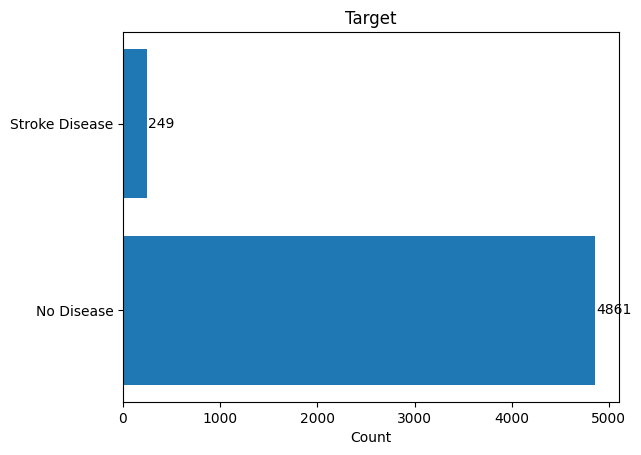

In [149]:
disease = len(df[df['stroke'] == 1])
no_disease = len(df[df['stroke']== 0])

plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Stroke Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

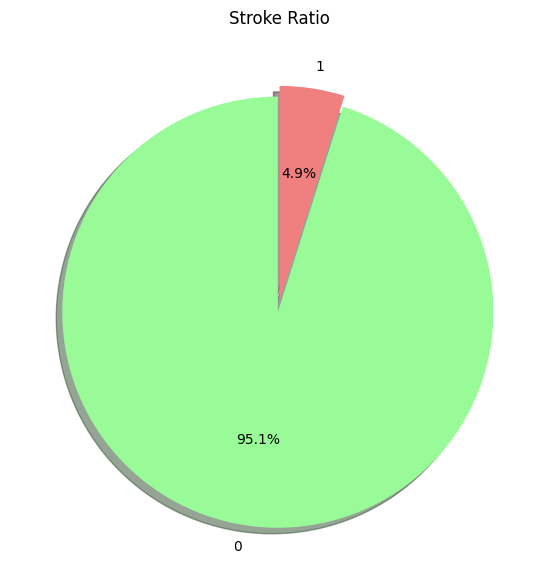

0    4861
1     249
Name: stroke, dtype: int64

In [150]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["palegreen","LightCoral"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Stroke Ratio')
plt.show()

df.stroke.value_counts()

Based on the diagram, the ratio between people who has stroke and not is around 1 : 20, which is pretty imbalanced.

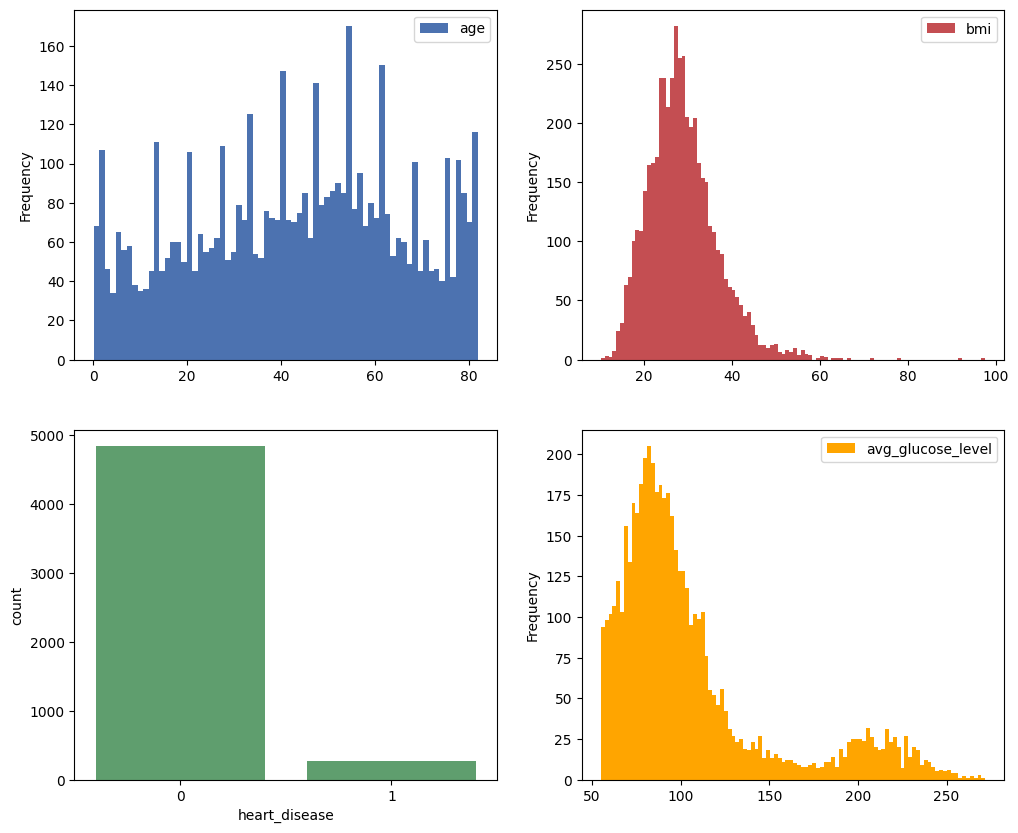

In [151]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
sns.countplot(x="heart_disease", color="g",data=df, ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

Blue: The samples were taken from a huge range of age.
Red: The BMI distribution has a median of around 30, which is considered as overweight.
Yellow: The samples' average glucose level has a median of around 80, which is in the normal level.

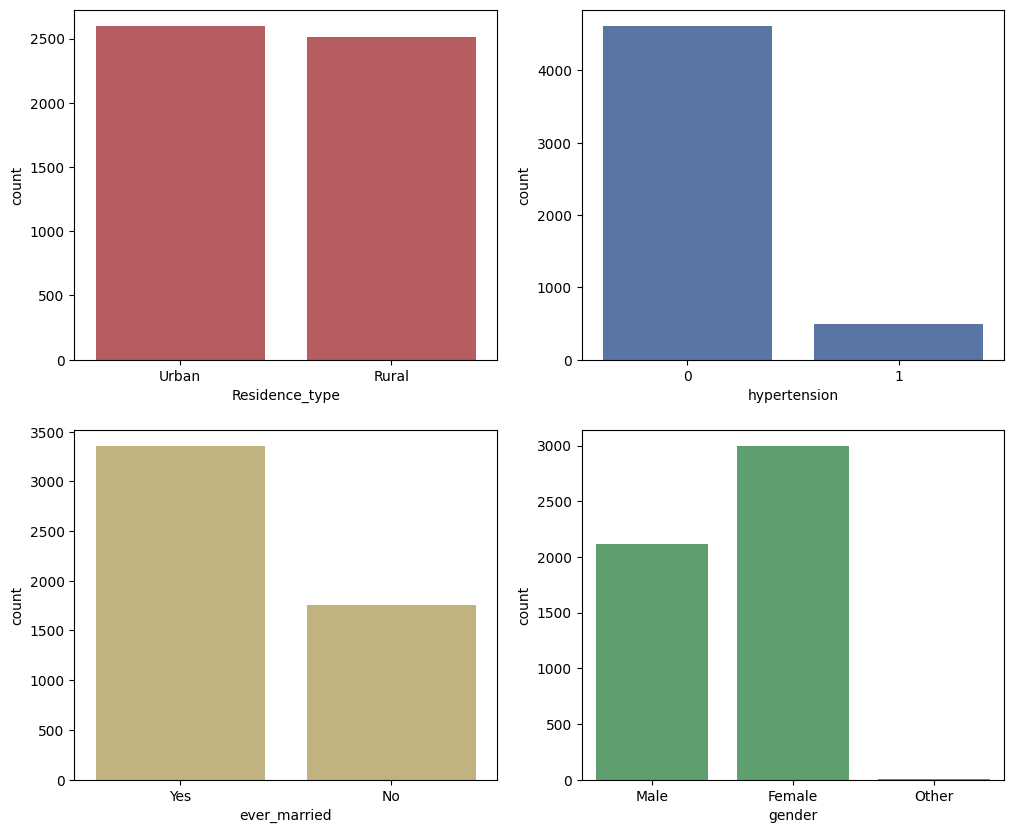

In [152]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
sns.countplot(x="Residence_type",color="r",data=df,ax=axes[0][0])
sns.countplot(x="hypertension",color="b",data=df,ax=axes[0][1])
sns.countplot(x="ever_married",color="y",data=df,ax=axes[1][0])
sns.countplot(x="gender",color="g",data=df,ax=axes[1][1])

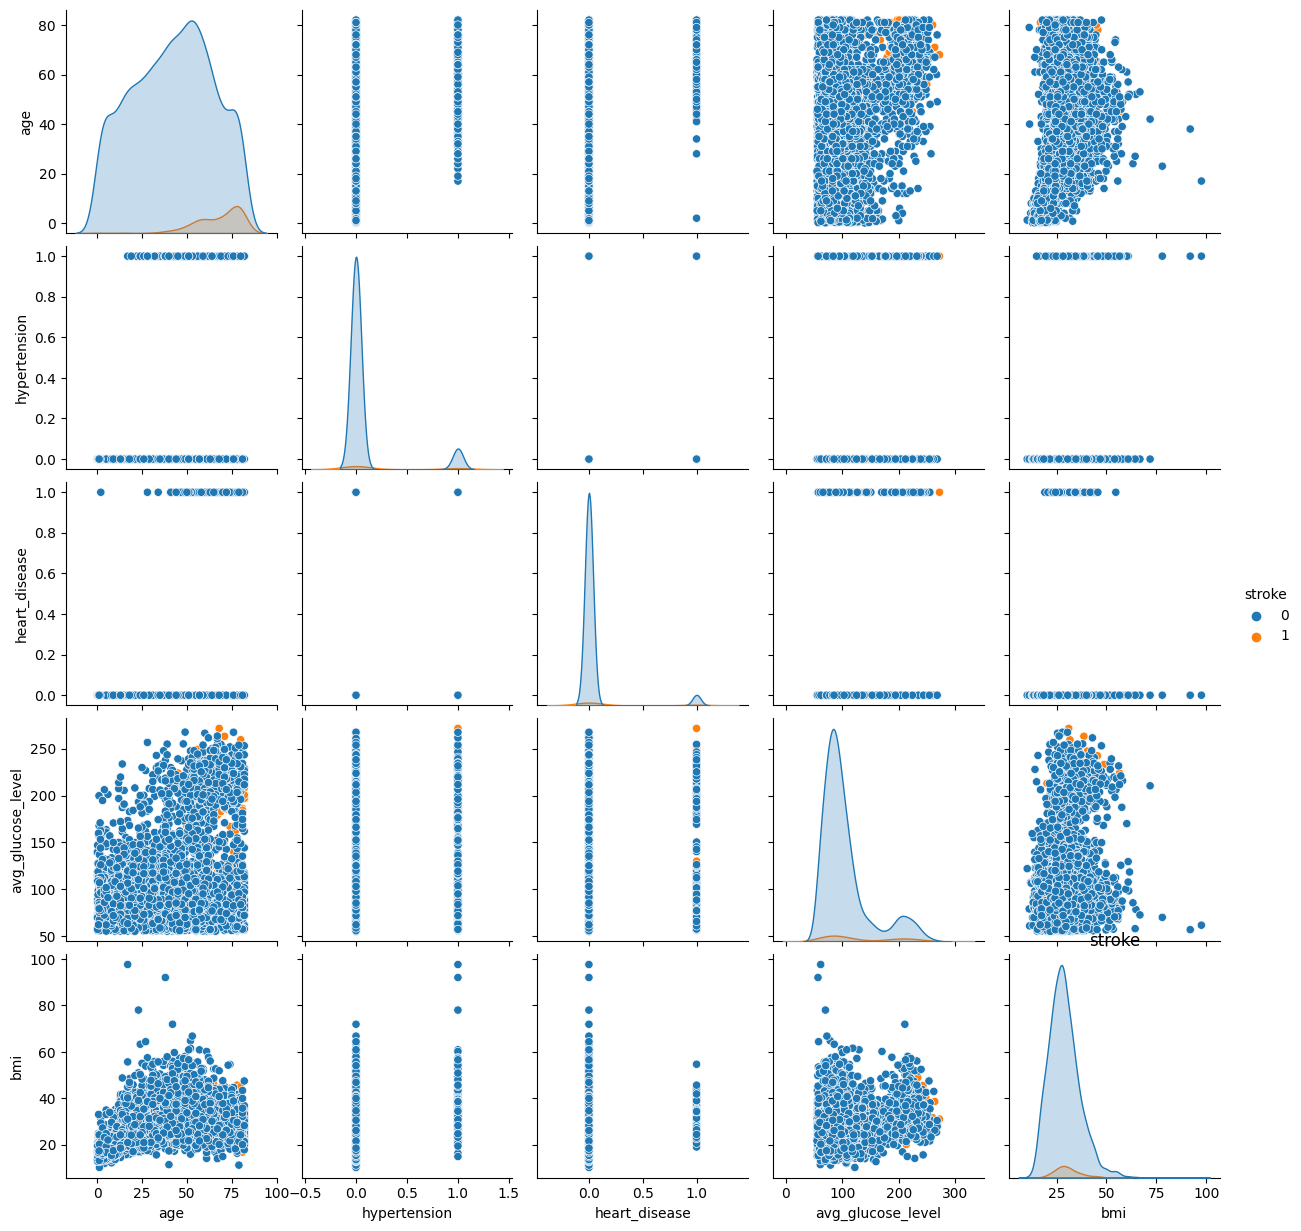

In [153]:
sns.pairplot(df, hue="stroke");
plt.title("stroke");

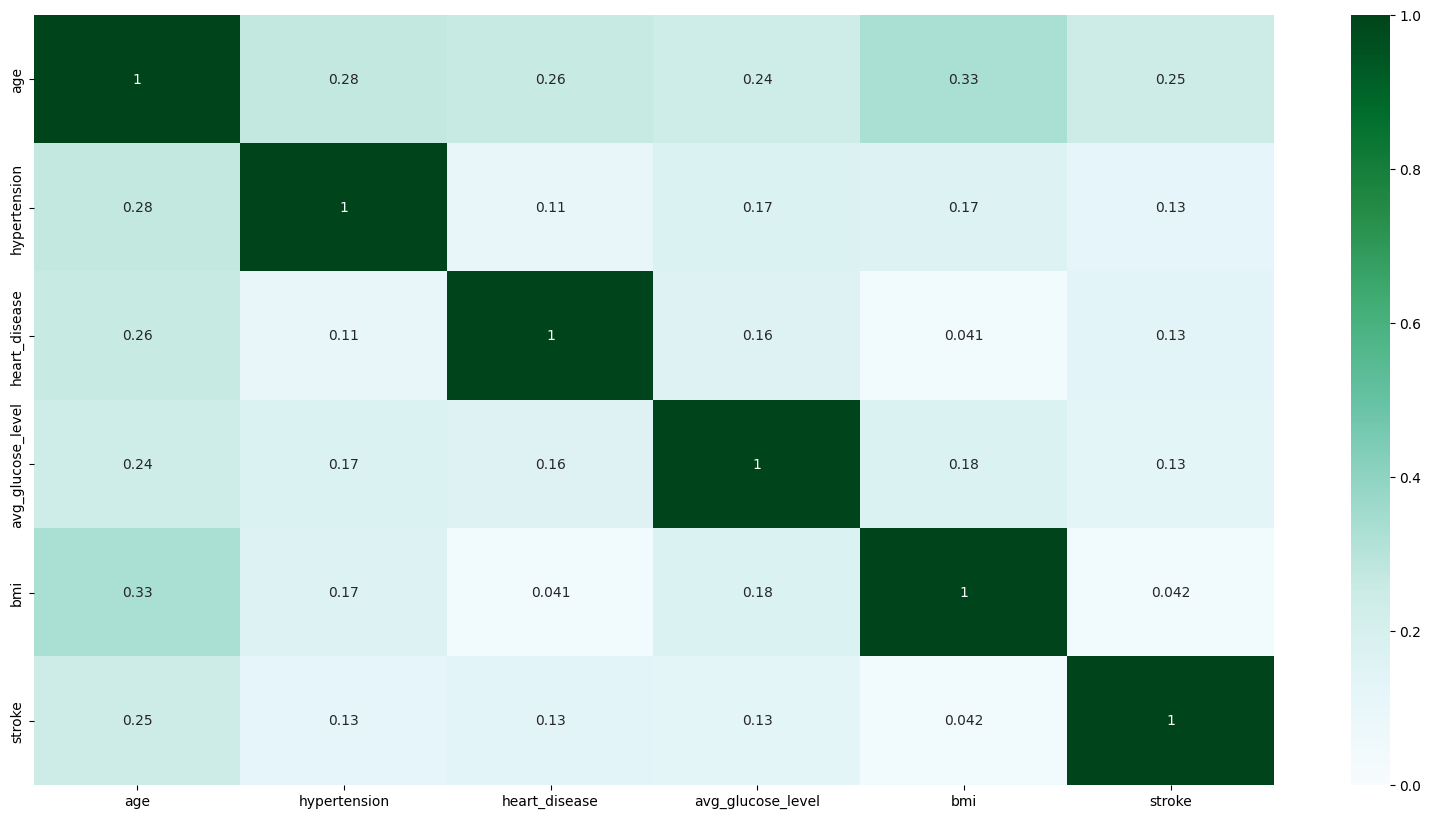

In [154]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1,cmap ="BuGn");

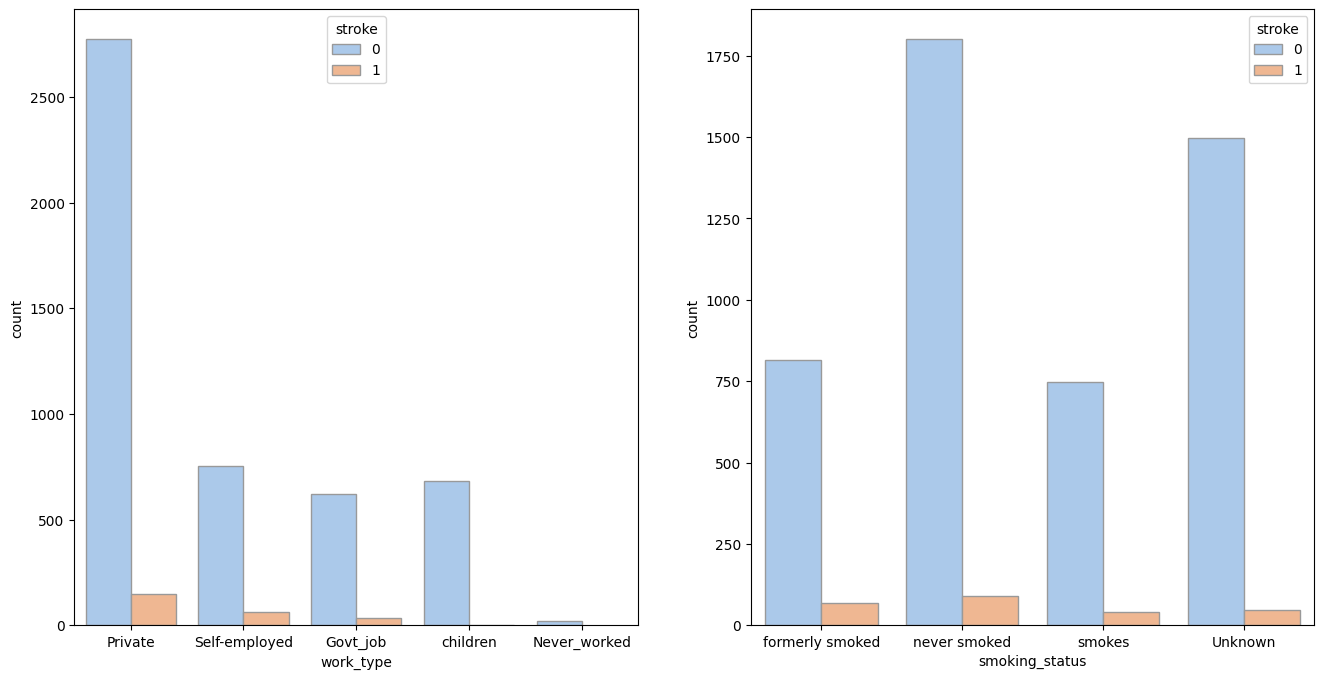

In [155]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))

sns.countplot(data=df, x='work_type', hue='stroke', palette="pastel", edgecolor=".6", ax= ax[0])
sns.countplot(data=df, x='smoking_status', hue='stroke', palette="pastel", edgecolor=".6", ax= ax[1])

1. From the work type diagram, it can be seen that people in the private industry has less chance of getting stroke compared to self-employed and govt job.
2. Surprisingly, looking at the graph, samples who has smoked and never smoked gives a similar ratio. We can assume that smoking status is not a relevant feature for predicting stroke.

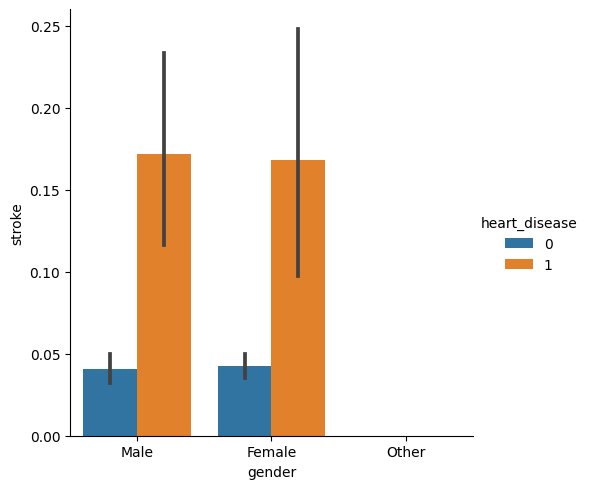

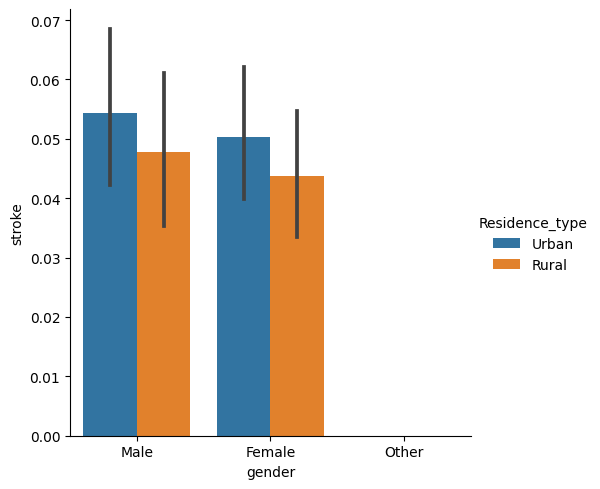

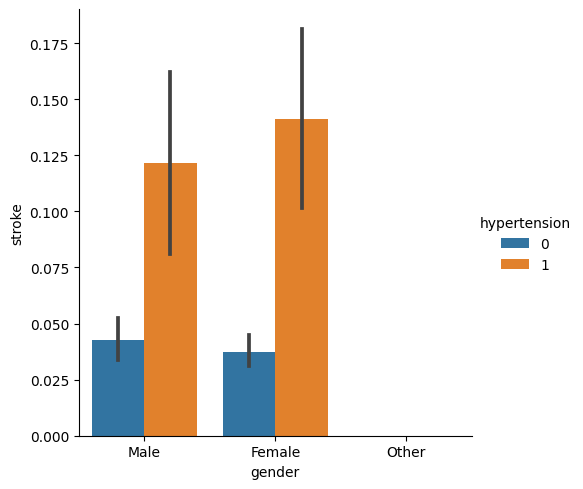

In [156]:
sns.catplot(y = "stroke",x = "gender", hue = "heart_disease",data = df, kind = "bar")
sns.catplot(y = "stroke",x = "gender", hue = "Residence_type",data = df, kind = "bar")
sns.catplot(y = "stroke",x = "gender", hue = "hypertension",data = df, kind = "bar")

1.  We can see from the plots that the gender is not a feature that discriminates a person having a stroke or not.
2. Hypertension and heart disease features are correlated to stroke as we could expect.

In [157]:
len_data = len(df)
len_w = len(df[df["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

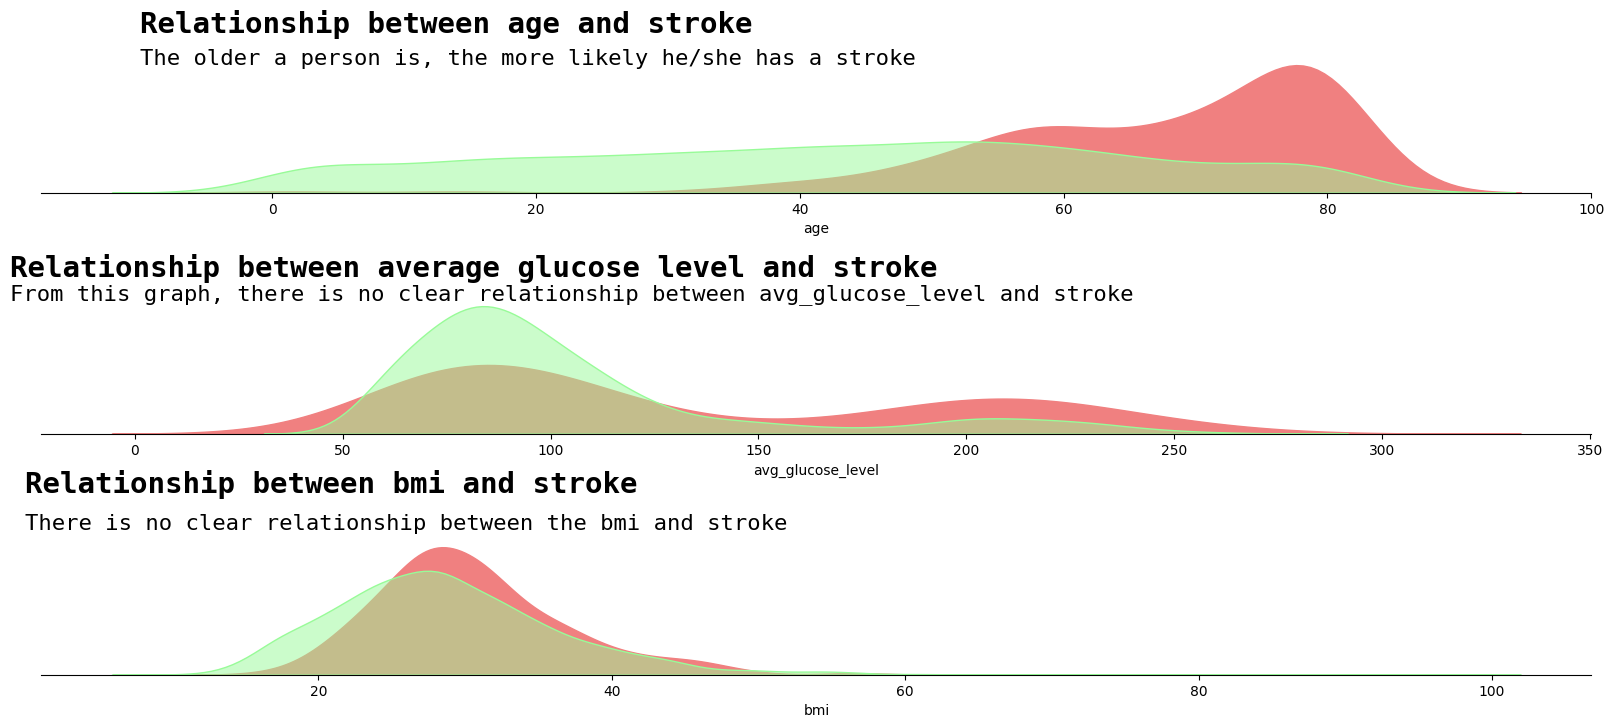

In [158]:
fig=plt.figure(figsize=(20,8),facecolor='white')

ax=[None for i in range(3)]
gs=fig.add_gridspec(3,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])
ax[2]=fig.add_subplot(gs[2,0])

ax[0].text(-10,0.05,'Relationship between age and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-10,0.04,'The older a person is, the more likely he/she has a stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[1].text(-30,0.02,'Relationship between average glucose level and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-30,0.017,'From this graph, there is no clear relationship between avg_glucose_level and stroke',fontsize=16,fontweight='light', fontfamily='monospace')
ax[2].text(0,0.1,'Relationship between bmi and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[2].text(0,0.08,'There is no clear relationship between the bmi and stroke',fontsize=16,fontweight='light', fontfamily='monospace')

sns.kdeplot(data=df[df.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='bmi',ax=ax[2],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='bmi',ax=ax[2],shade=True,color='palegreen',alpha=0.5)

for i in range(3):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,475,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


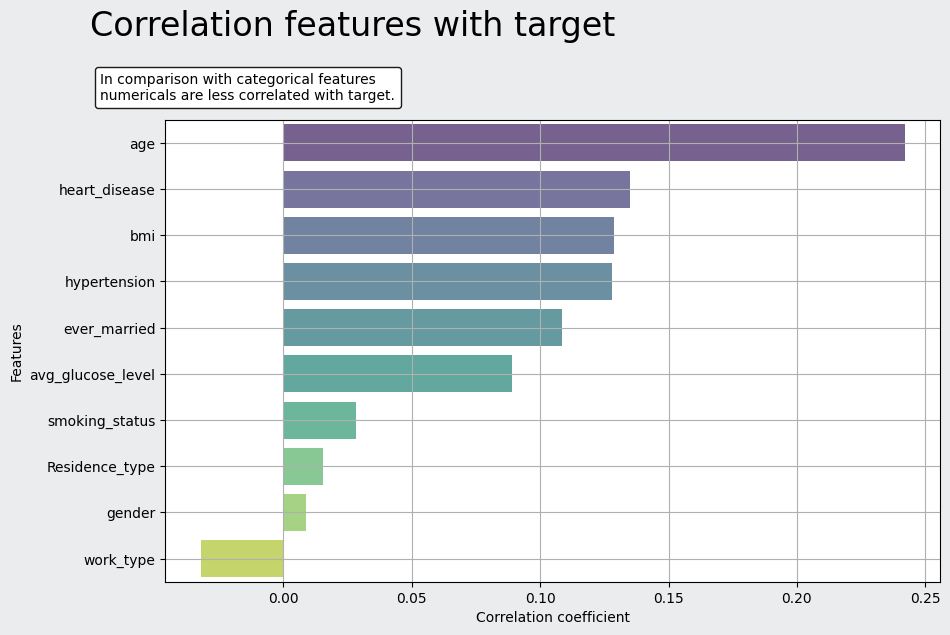

In [160]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'bmi', 'avg_glucose_level']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)
title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

1. Based on this diagram, the top 5 most relevant feature to predict stroke are age, heart disease, bmi, hypertension and ever married.
2. However, based on the diagram before this, it is concluded that BMI does not correlate well with the event of stroke.



# Data Cleaning and Preparation

### Checking for NA values

In [161]:
display(df.isna().sum())
print('DataFrame Shape:', df.shape)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

DataFrame Shape: (5110, 11)


### Encode Categorical Variables

In [162]:
Gender = {'Male':1,'Female':0,'Other':2}

df['gender'] = [Gender[item] for item in df['gender']]

In [163]:
married = {'Yes':1,'No':0}

df['ever_married'] = [married[item] for item in df['ever_married']]

In [164]:
residence = {'Urban':1,'Rural':0}

df['Residence_type'] = [residence[item] for item in df['Residence_type']]

In [165]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [166]:
data_dummies = df[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

In [167]:
data_dummies.head()

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0


In [168]:
data_dummies.isnull().sum()

smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
dtype: int64

In [169]:
data_dummies.reset_index(drop = True, inplace=True)

### Fill NA Values in BMI with KNN Imputer

In [170]:
from sklearn.impute import KNNImputer

df_imputed = df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
df_imputed = imputer.fit_transform(df_imputed)

In [171]:
df_imputed = pd.DataFrame(df_imputed, columns = ["gender",	"age",	"hypertension",	"heart_disease",	"ever_married",	"Residence_type",	"avg_glucose_level",	"bmi", "stroke"])
df_imputed.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.600,1.0
1,0.0,61.0,0.0,0.0,1.0,0.0,202.21,32.225,1.0
2,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.500,1.0
3,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.400,1.0
4,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.000,1.0


In [172]:
df_imputed.shape

(5110, 9)

In [173]:
df_imputed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [174]:
Y = df_imputed['stroke']

df_imputed.drop(columns=['stroke'],inplace=True)

X = df_imputed.merge(data_dummies,left_index=True, right_index = True ,how='left')

display(X.head(10))
print('shape of X and Y respectively: ', X.shape,Y.shape)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.600,0,1,0,0,0,0,1,0,0
1,0.0,61.0,0.0,0.0,1.0,0.0,202.21,32.225,0,0,1,0,0,0,0,1,0
2,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.500,0,0,1,0,0,0,1,0,0
3,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.400,0,0,0,1,0,0,1,0,0
4,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.000,0,0,1,0,0,0,0,1,0
5,1.0,81.0,0.0,0.0,1.0,1.0,186.21,29.000,0,1,0,0,0,0,1,0,0
6,1.0,74.0,1.0,1.0,1.0,0.0,70.09,27.400,0,0,1,0,0,0,1,0,0
7,0.0,69.0,0.0,0.0,0.0,1.0,94.39,22.800,0,0,1,0,0,0,1,0,0
8,0.0,59.0,0.0,0.0,1.0,0.0,76.15,27.150,1,0,0,0,0,0,1,0,0
9,0.0,78.0,0.0,0.0,1.0,1.0,58.57,24.200,1,0,0,0,0,0,1,0,0


shape of X and Y respectively:  (5110, 17) (5110,)


### Splitting Dataset into Train and Test

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0, stratify = Y)
print("Train Set : ",Y_train.shape,X_train.shape)
print("Test Set : ",Y_test.shape,X_test.shape)

Train Set :  (4088,) (4088, 17)
Test Set :  (1022,) (1022, 17)


In [176]:
Y_train.value_counts()

0.0    3889
1.0     199
Name: stroke, dtype: int64

In [177]:
np.all(np.isfinite(X))

True

In [178]:
np.any(np.isnan(X))

False

In [179]:
X.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
dtype: int64

### Standardise Data

In [180]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
943,0.0,75.0,0.0,0.0,1.0,1.0,86.40,42.6,0,0,1,0,0,0,1,0,0
821,0.0,70.0,1.0,0.0,1.0,0.0,88.66,36.7,0,1,0,0,1,0,0,0,0
4675,1.0,8.0,0.0,0.0,0.0,0.0,63.43,21.8,1,0,0,0,0,0,0,0,1
3737,0.0,73.0,0.0,0.0,1.0,0.0,98.69,27.6,1,0,0,0,0,0,0,1,0
2067,0.0,40.0,0.0,0.0,1.0,0.0,212.97,49.8,0,1,0,0,0,0,0,1,0


In [181]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [182]:
X_train

array([[-0.84628888,  1.39425873, -0.33024432, ...,  0.86732365,
        -0.43521187, -0.39923353],
       [-0.84628888,  1.17463757,  3.02806113, ..., -1.15297213,
        -0.43521187, -0.39923353],
       [ 1.18162961, -1.54866488, -0.33024432, ..., -1.15297213,
        -0.43521187,  2.50479966],
       ...,
       [-0.84628888, -0.53840752, -0.33024432, ...,  0.86732365,
        -0.43521187, -0.39923353],
       [ 1.18162961, -0.40663482, -0.33024432, ...,  0.86732365,
        -0.43521187, -0.39923353],
       [-0.84628888,  1.04286487,  3.02806113, ...,  0.86732365,
        -0.43521187, -0.39923353]])

### Use SMOTE to balance the data

In [183]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

Before OverSampling, counts of label '1': 199
Before OverSampling, counts of label '0': 3889 



In [184]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy = 0.7)
X_train,Y_train = oversample.fit_resample(X_train,Y_train)

print("Train Set : ",Y_train.shape,X_train.shape)
print("Test Set : ",Y_test.shape,X_test.shape)

print("After OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train==0)))

Train Set :  (6611,) (6611, 17)
Test Set :  (1022,) (1022, 17)
After OverSampling, counts of label '1': 2722
After OverSampling, counts of label '0': 3889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



### Choose the most relevant features to the target

<ol start = "0">
<li>gender                            
<li>age                               
<li>hypertension                      
<li>heart_disease                     
<li>ever_married                      
<li>Residence_type                    
<li>avg_glucose_level                 
<li>bmi                               
<li>smoking_status_formerly smoked    
<li>smoking_status_never smoked       
<li>smoking_status_smokes             
<li>work_type_Govt_job                
<li>work_type_Never_worked            
<li>work_type_Private                 
<li>work_type_Self-employed           <li>work_type_children                

In here, we chose the 4 most relevant features we had decided earlier, i.e., age, hypertension, heart disease, and ever married.

In [185]:
X_train_feature = pd.DataFrame(X_train)
X_train_feature = X_train_feature.iloc[:,1:5]
X_train_feature.head()

,1,2,3,4
0,1.394259,-0.330244,-0.236765,0.727577
1,1.174638,3.028061,-0.236765,0.727577
2,-1.548665,-0.330244,-0.236765,-1.374426
3,1.306410,-0.330244,-0.236765,0.727577
4,-0.143089,-0.330244,-0.236765,0.727577


In [186]:
X_test_feature = pd.DataFrame(X_test)
X_test_feature = X_test_feature.iloc[:,1:5]
X_test_feature.head()

,1,2,3,4
0,-0.889801,-0.330244,-0.236765,-1.374426
1,0.252229,-0.330244,-0.236765,0.727577
2,0.471850,-0.330244,-0.236765,0.727577
3,-0.450559,-0.330244,-0.236765,0.727577
4,0.691471,-0.330244,-0.236765,0.727577


In [187]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

# Machine Learning Models

##Logistic Regression

In [188]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_feature,Y_train)
Y_pred = model.predict(X_test_feature)
score = model.score(X_train_feature,Y_train)
print('Training Score: ', score)
score = model.score(X_test_feature,Y_test)
print('Testing Score: ', score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted==1]["Predicted"]
rate_people = 0
if len(people)>0:
    rate_people = len(people)/len(output)
print("% of people predicted with stroke disease: ", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Score:  0.7898956284979579
Testing Score:  0.7847358121330724
   Predicted
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
% of people predicted with stroke disease:  0.2191780821917808
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       972
         1.0       0.12      0.54      0.20        50

    accuracy                           0.78      1022
   macro avg       0.55      0.67      0.54      1022
weighted avg       0.93      0.78      0.84      1022



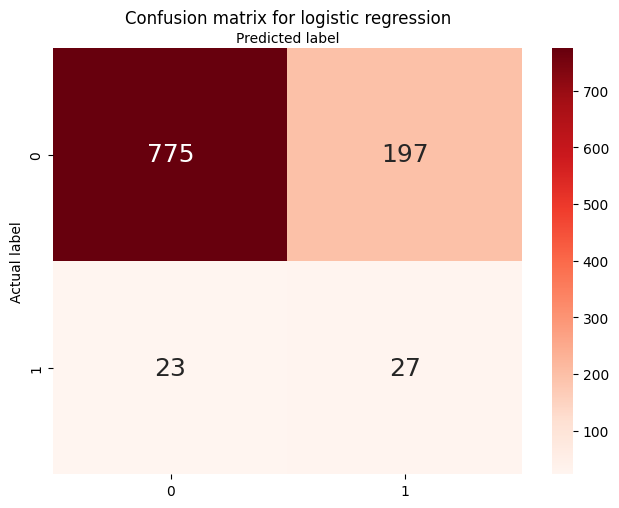

In [189]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Reds',fmt='g',annot_kws={"size": 18})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

##Decision Tree Classifier

In [190]:
print('Decision Tree Classifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=3,max_depth=5)
decision_tree.fit(X_train_feature,Y_train)
Y_pred = model.predict(X_test_feature)
score = model.score(X_train_feature,Y_train)
print('Training Score: ',score)
score = model.score(X_test_feature,Y_test)
print('Testing Score: ',score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted==1]["Predicted"]
rate_people = 0
if len(people)>0:
    rate_people = len(people)/len(output)
print("% of people predicted with stroke disease: ",rate_people)
score_dtc = score
out_dtc = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

Decision Tree Classifier
Training Score:  0.7898956284979579
Testing Score:  0.7847358121330724
   Predicted
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
% of people predicted with stroke disease:  0.2191780821917808
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       972
         1.0       0.12      0.54      0.20        50

    accuracy                           0.78      1022
   macro avg       0.55      0.67      0.54      1022
weighted avg       0.93      0.78      0.84      1022



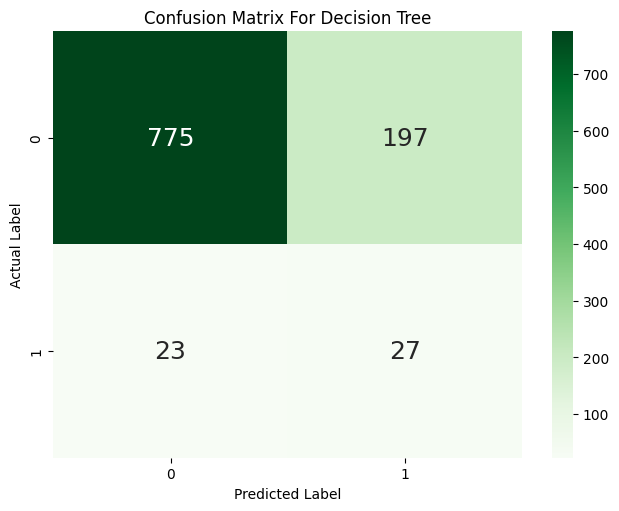

In [191]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig.ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Greens',fmt='g',annot_kws={"size": 18})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix For Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Random Forest Classifier

In [192]:
print('Random Forest Classifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=3,max_depth=5)
model.fit(X_train_feature,Y_train)
Y_pred = model.predict(X_test_feature)
score = model.score(X_train_feature,Y_train)
print('Training Score: ',score)
score = model.score(X_test_feature,Y_test)
print('Testing Score: ',score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted==1]['Predicted']
rate_people = 0
if len(people)>0:
    rate_people = len(people)/len(output)
print("% of people predicted with stroke disease : ",rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

Random Forest Classifier


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Score:  0.8178792920889427
Testing Score:  0.7436399217221135
   Predicted
0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
% of people predicted with stroke disease :  0.2622309197651663
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85       972
         1.0       0.10      0.56      0.18        50

    accuracy                           0.74      1022
   macro avg       0.54      0.66      0.51      1022
weighted avg       0.93      0.74      0.82      1022



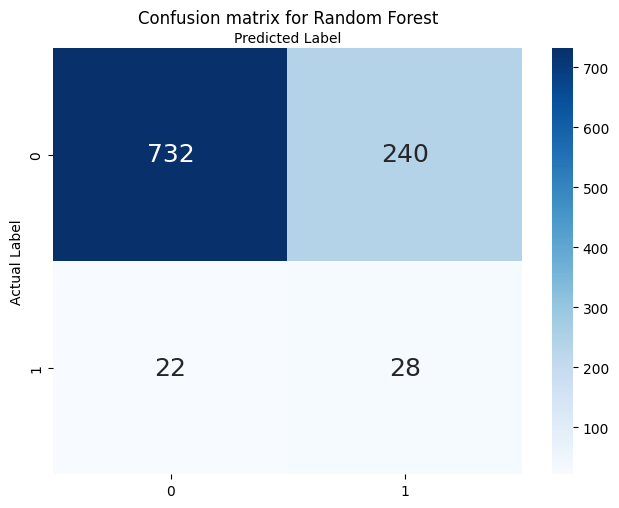

In [193]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Blues',fmt='g',annot_kws={"size": 18})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## KN Neighbors Classifier

In [194]:
print('KNeighbors Classifier')
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_feature,Y_train)
Y_pred = model.predict(X_test_feature)
score = model.score(X_train_feature,Y_train)
print('Training Score: ',score_logreg)
score = model.score(X_test_feature,Y_test)
print('Testing Score:',score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted==1]['Predicted']
rate_people = 0
if len(people)>0:
    rate_people = len(people)/len(output)
print('% of people predicted with stroke disease: ',rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

KNeighbors Classifier


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Score:  0.7847358121330724
Testing Score: 0.913894324853229
   Predicted
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
% of people predicted with stroke disease:  0.04892367906066536
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       972
         1.0       0.12      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022



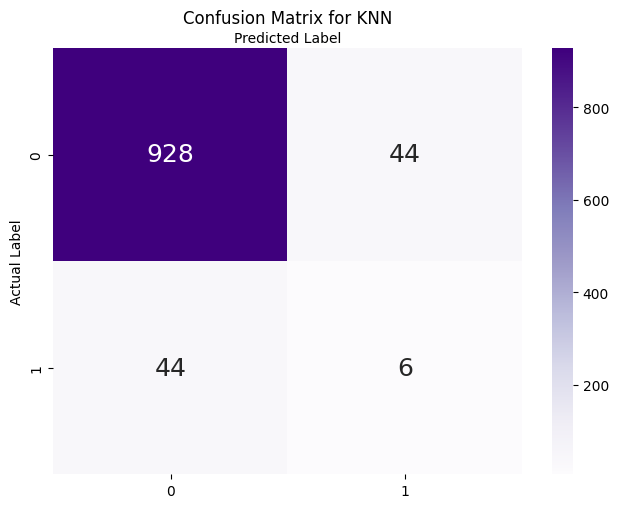

In [195]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Purples',fmt='g',annot_kws={"size": 18})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## XG Boost Classifier

In [196]:
print('XGBoost Classifier')
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5,learning_rate=0.01,n_estimators=100,gamma=0,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005)
model.fit(X_train_feature,Y_train)
Y_pred = model.predict(X_test_feature)
score = model.score(X_train_feature,Y_train)
print('Training Score: ',score_logreg)
score = model.score(X_test_feature,Y_test)
print('Testing Score:',score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted==1]['Predicted']
rate_people = 0
if len(people)>0:
    rate_people = len(people)/len(output)
print('% of people predicted with stroke disease: ',rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

XGBoost Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Score:  0.7847358121330724
Testing Score: 0.8013698630136986
   Predicted
0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
% of people predicted with stroke disease:  0.19275929549902152
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89       972
         1.0       0.11      0.44      0.18        50

    accuracy                           0.80      1022
   macro avg       0.54      0.63      0.53      1022
weighted avg       0.92      0.80      0.85      1022



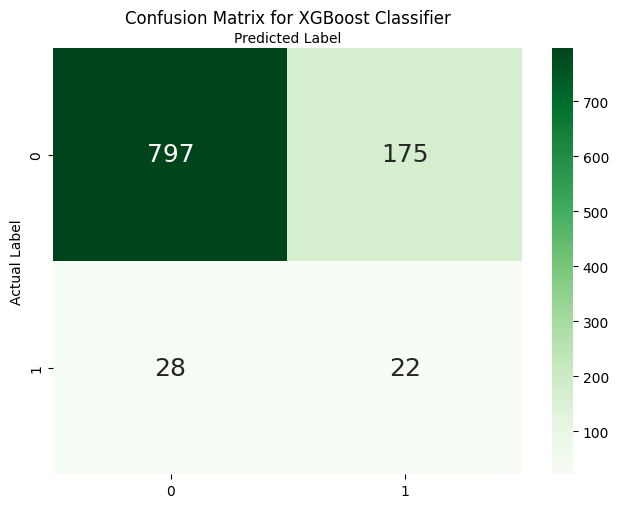

In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Greens',fmt='g',annot_kws={"size": 18})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for XGBoost Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## SGD Classifier

In [198]:
print('SGD Classifier')
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train_feature,Y_train)
Y_pred = model.predict(X_test_feature)
score = model.score(X_train_feature,Y_train)
print('Training Score: ',score_logreg)
score = model.score(X_test_feature,Y_test)
print('Testing Score:',score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted==1]['Predicted']
rate_people = 0
if len(people)>0:
    rate_people = len(people)/len(output)
print('% of people predicted with stroke disease: ',rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

SGD Classifier
Training Score:  0.7847358121330724
Testing Score: 0.8101761252446184
   Predicted
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
% of people predicted with stroke disease:  0.19373776908023482
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89       972
         1.0       0.14      0.54      0.22        50

    accuracy                           0.81      1022
   macro avg       0.55      0.68      0.55      1022
weighted avg       0.93      0.81      0.86      1022



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



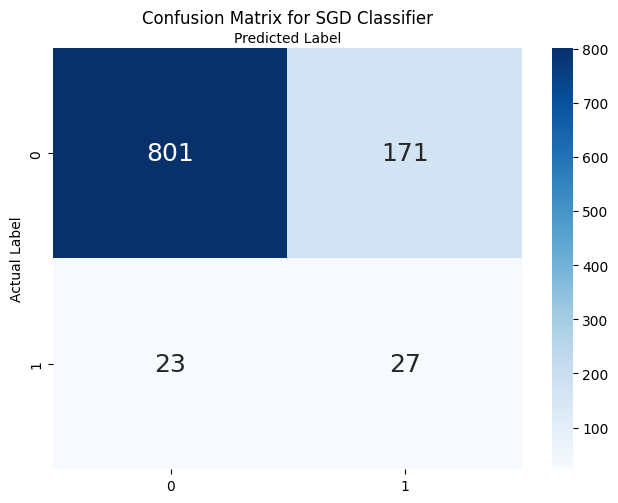

In [199]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Blues',fmt='g',annot_kws={"size": 18})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for SGD Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Ada Boost Classifier

In [200]:
print('AdaBoost Classifier')
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100,random_state=3)
model.fit(X_train_feature,Y_train)
Y_pred = model.predict(X_test_feature)
score = model.score(X_train_feature,Y_train)
print('Training Score: ',score_logreg)
score = model.score(X_test_feature,Y_test)
print('Testing Score:',score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted==1]['Predicted']
rate_people = 0
if len(people)>0:
    rate_people = len(people)/len(output)
print('% of people predicted with stroke disease: ',rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

AdaBoost Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Score:  0.7847358121330724
Testing Score: 0.7671232876712328
   Predicted
0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
% of people predicted with stroke disease:  0.23874755381604695
              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86       972
         1.0       0.11      0.56      0.19        50

    accuracy                           0.77      1022
   macro avg       0.54      0.67      0.53      1022
weighted avg       0.93      0.77      0.83      1022



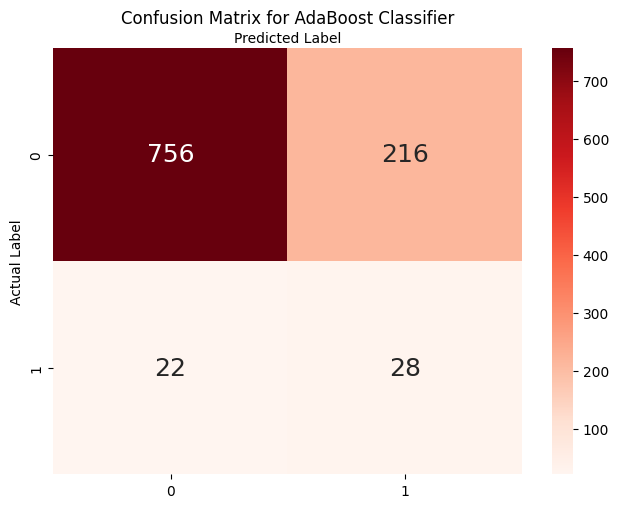

In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Reds',fmt='g',annot_kws={"size": 18})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Support Vector Machine

In [202]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = SVC(C=0.03)
model.fit(X_train_feature, Y_train)

Y_pred = model.predict(X_test_feature)
ac = accuracy_score(Y_test,Y_pred)
con = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test,Y_pred))
print("SVC model accuracy",ac)
print(con)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85       972
         1.0       0.12      0.68      0.21        50

    accuracy                           0.74      1022
   macro avg       0.55      0.71      0.53      1022
weighted avg       0.94      0.74      0.82      1022

SVC model accuracy 0.7436399217221135
[[726 246]
 [ 16  34]]


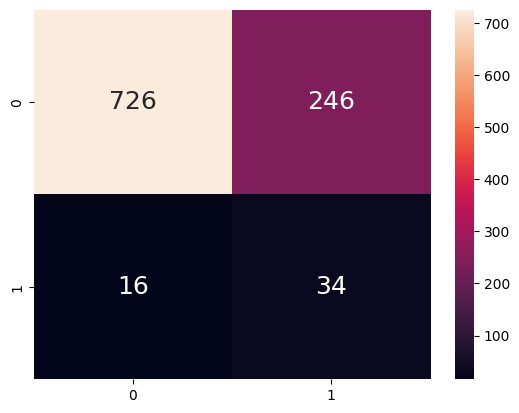

In [203]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Artificial Neural Network Approach

In [204]:
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import tensorflow as tf

In [205]:
X_train_feature.shape

(6611, 4)

In [206]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [207]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

# Initialising the Neural Network
model = Sequential()

# Adding the layers (20 layers including input layer; added dropout in between)

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dropout(0.4))

model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the Neural Network
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the Neural Network
history = model.fit(X_train_feature, Y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
166/166 [==============================] - 5s 15ms/step - loss: 0.6829 - accuracy: 0.7354 - val_loss: 0.9210 - val_accuracy: 0.0000e+00
Epoch 2/150
166/166 [==============================] - 2s 13ms/step - loss: 0.5881 - accuracy: 0.7354 - val_loss: 1.2967 - val_accuracy: 0.0000e+00
Epoch 3/150
166/166 [==============================] - 2s 13ms/step - loss: 0.5313 - accuracy: 0.7354 - val_loss: 1.0097 - val_accuracy: 0.0000e+00
Epoch 4/150
166/166 [==============================] - 2s 13ms/step - loss: 0.4436 - accuracy: 0.7354 - val_loss: 0.8863 - val_accuracy: 0.0000e+00
Epoch 5/150
166/166 [==============================] - 2s 13ms/step - loss: 0.4296 - accuracy: 0.7354 - val_loss: 0.8700 - val_accuracy: 0.0000e+00
Epoch 6/150
166/166 [==============================] - 2s 13ms/step - loss: 0.4309 - accuracy: 0.7354 - val_loss: 0.8427 - val_accuracy: 0.0000e+00
Epoch 7/150
166/166 [==============================] - 2s 13ms/step - loss: 0.4288 - accuracy: 0.7354 - val_loss

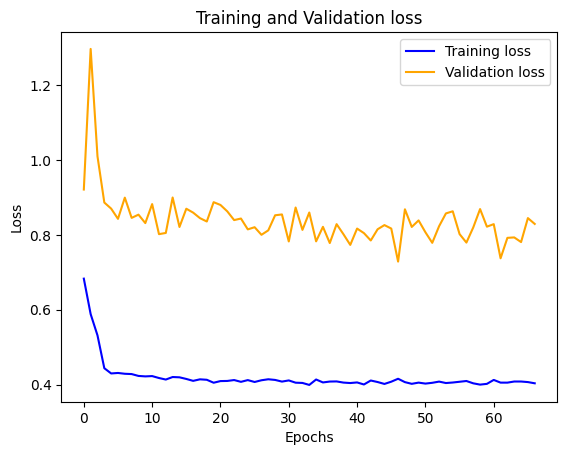

In [208]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "blue", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"orange", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

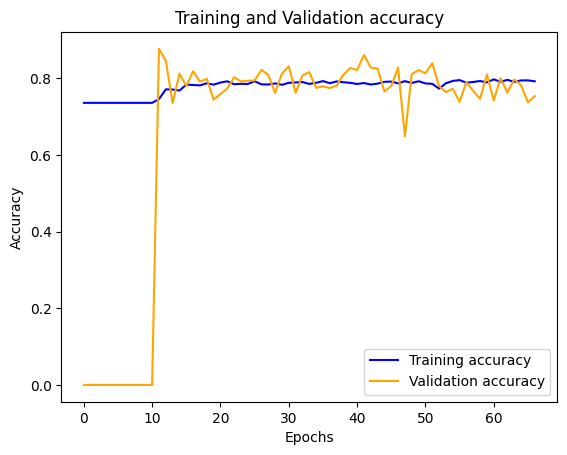

In [209]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "blue", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "orange", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

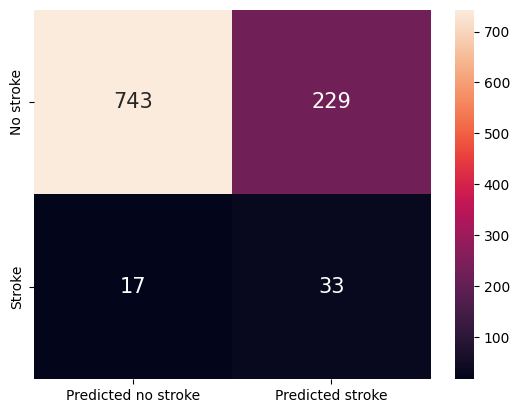

In [210]:
y_pred = model.predict(X_test_feature)
y_pred = (y_pred > 0.5)

cf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':15}, fmt='g', yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])

In [211]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86       972
         1.0       0.13      0.66      0.21        50

    accuracy                           0.76      1022
   macro avg       0.55      0.71      0.53      1022
weighted avg       0.94      0.76      0.83      1022



##Machine Learning Models Results

The accuracy of these 9 models might be relatively low. However, in this particular problem and with our objective in mind, we have decided that a high recall (TP / (TP + FN)) is more crucial than accuracy. If we want to implement this in a real world situation, it is better that people be misdiagnosed with having a stroke, rather than be misdiagnosed as healthy, since the latter may lead to unwanted events. Thus, we should not focus solely on accuracy.

Another thing to keep in mind is that people with the same disease - in this case, stroke - may not always show the same traits, explaining the false negatives. For the false negatives, our team also noted that this people may possibly be a candidate for an event of stroke since they show the trait of someone who does. Moreover, there may also other factors that may affect the event of a stroke which are not listed in the dataset. Therefore, it is challenging to predict fully by using this dataset only.


# Conclusion

To summarize, we will go back to our objective of this project, which is to use and compare various models to find which model is best suited to classify whether someone has stroke or not. 

Based on our results, the 2 best models with a fairly high test accuracy accompanied with a relatively high recall rate are the Support Vector Machine and Neural Network. 

SVM - Accuracy: 0.74; Recall: 0.68

ANN - Accuracy: 0.76; Recall: 0.66

However, since we prioritize recall over accuracy, we have chosen the Support Vector Machine as the better model as it gives the highest recall rate of 0.68.

(The results of the Neural Network model differs from the one in the slides as it has random weight initialization and random dropout; results may change upon running)